# 🚜Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check : https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/1_sAuCfTwN2KU5uu_Gvz9rFIueFyycBt6/edit?usp=sharing&ouid=113812721184901390129&rtpof=true&sd=true


In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [6]:
# Import training and validation sets
df = pd.read_csv("/content/drive/MyDrive/ml_project_2/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

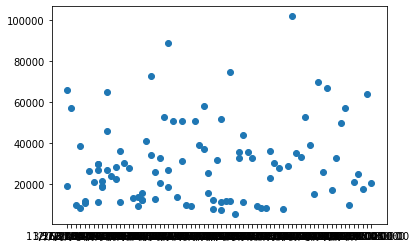

In [8]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:100], df["SalePrice"][:100]);

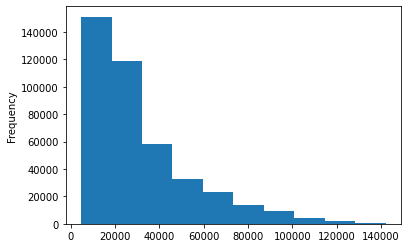

In [9]:
df.SalePrice.plot.hist();

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [10]:
# Import data again but this time parse dates
df = pd.read_csv("/content/drive/MyDrive/ml_project_2/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [11]:
df.saledate.dtype

dtype('<M8[ns]')

In [12]:
df["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

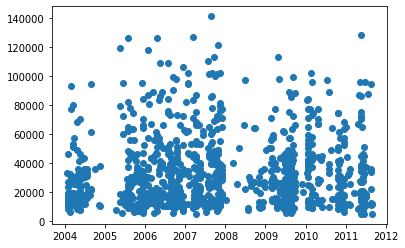

In [13]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

In [14]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [15]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [16]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], ascending=True, inplace=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [17]:
# Make a copy
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [18]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.dayofyear

In [19]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [20]:
# Now we've enriched our DataFrame with date time features, we can remove `saledate`
df_tmp.drop("saledate", axis=1, inplace=True)

In [21]:
# Check values of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We've done enough EDA (we could always do more) but let's start to do some model driven EDA.

In [22]:
#np.random.seed(42)

# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
#model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])
#................................................................
# ValueError: could not convert string to float: 'Low'

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check different datatypes compatible with pandas here:
https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#categoricals

In [23]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [24]:
# Find the columns which contain strings
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
# If you're wondering what df.items() does, here's an example
random_dict = {"key1": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
  print(f"this is a key: {key}",
        f"this is a value: {value}")

this is a key: key1 this is a value: hello
this is a key: key2 this is a value: world!


In [26]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()

In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [28]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [29]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have bunch of missing data..

In [30]:
# Check missing data
df_tmp.isnull().sum() / len(df_tmp) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Save preprocessed data

In [31]:
# Export current tmp dataframe
df_tmp.to_csv("/content/drive/MyDrive/ml_project_2/train_tmp.csv",
              index=False)

In [32]:
# Import preprocessed data
df_tmp = pd.read_csv("/content/drive/MyDrive/ml_project_2/train_tmp.csv",
                     low_memory=False)

## Fill missing values

### Fill numerical missing values first

In [33]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [34]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [35]:
# Fill numric rows with the median
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tells us if the data was missing or not
      df_tmp[label+"_is_missing"] = pd.isnull(content)
      # Fill missing numeric values with median
      df_tmp[label] = content.fillna(content.median())

In [36]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [37]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [38]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

### Filling and turning categorical variables into numbers

In [39]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [40]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    
      # Add binary column to indicate whether sample had missing value
      df_tmp[label+"_is_missing"] = pd.isnull(content)
      # Turn categories into numbers and add +1
      df_tmp[label] = pd.Categorical(content).codes+1

In [41]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [42]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [43]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [44]:
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label) 

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [45]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
#model.fit(df_tmp.drop("SalePrice", axis=1),
#          df_tmp["SalePrice"])

CPU times: user 38 µs, sys: 3 µs, total: 41 µs
Wall time: 43.4 µs


In [46]:
# Score the model
#model.score(df_tmp.drop("SalePrice", axis=1),
#            df_tmp["SalePrice"])

**Question:** Why doesn't the above metric hold water? (why isn't the metric reliable)

### Splitting data into train/validation sets

In [47]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [48]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

In [49]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [50]:
# Create evaluation function (RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.metrics import r2_score

def rmsle(y_test, y_preds):
  """
  Calculates root mean squared log error between predictions and
  true labels.
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_valid, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_valid, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, val_preds)}
  return scores

## Testing our model on a subset (to tune the hyperparameters)

In [51]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [52]:
%%time
# Cutting down on the max number of samples each estimator can see improved training time
model.fit(X_train, y_train)

CPU times: user 48.1 s, sys: 174 ms, total: 48.3 s
Wall time: 27.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [53]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [54]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 54.2 s, sys: 3.68 s, total: 57.8 s
Wall time: 1min 45s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [55]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 5}

In [56]:
show_scores(rs_model)

{'Training MAE': 9466.502185802205,
 'Valid MAE': 10617.589927909892,
 'Training RMSLE': 0.4049266647425955,
 'Valid RMSLE': 0.42006834490781764,
 'Training R^2': 0.638526688769502,
 'Valid R^2': 0.6592387422191992}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`.

In [57]:
%%time

# Most ideal hyperparameters 
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 4min 34s, sys: 780 ms, total: 4min 35s
Wall time: 3min 14s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [58]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2958.295346982412,
 'Valid MAE': 5955.014459038368,
 'Training RMSLE': 0.14478565960382225,
 'Valid RMSLE': 0.24646893371187553,
 'Training R^2': 0.958767698880574,
 'Valid R^2': 0.8813556039694326}

In [59]:
# Scores for rs_model (trained on 10,000 samples)
show_scores(rs_model)

{'Training MAE': 9466.502185802205,
 'Valid MAE': 10617.589927909892,
 'Training RMSLE': 0.4049266647425955,
 'Valid RMSLE': 0.42006834490781764,
 'Training R^2': 0.638526688769502,
 'Valid R^2': 0.6592387422191992}

### Make prediction on test data

In [ ]:
# Import the test data
df_test = pd.read_csv("/content/drive/MyDrive/ml_project_2/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

In [61]:
# Make a prediction on test dataset
# test_preds = ideal_model.predict(df_test)
# .........................................
# ValueError: could not convert string to float: 'Low'

### Preprocessing the data (getting the test dataset in the same format as our training dataset.)

In [62]:
def preprocess_data(df):
  """
  Performs transformations on `df` and returns transformed `df`.
  """
  df["saleYear"] = df.saledate.dt.year
  df["saleMonth"] = df.saledate.dt.month
  df["saleDay"] = df.saledate.dt.day
  df["saleDayofWeek"] = df.saledate.dt.dayofweek
  df["saleDayofYear"] = df.saledate.dt.dayofyear

  df.drop("saledate", axis=1, inplace=True)  
  
  # Fill the numeric rows with median
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        # Add a binary column which tells us if the data was missing or not
        df[label+"_is_missing"] = pd.isnull(content)
        # Fill missing numeric values with median
        df[label] = content.fillna(content.median())
  

  # Fill the categorical missing data and turn categories into numbers
  for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
      # Add a binary column which tells us if the data was missing or not
      df[label+"_is_missing"] = pd.isnull(content)
      # We add +1 to the category code bacause pandas encodes missing categories as -1
      df[label] = pd.Categorical(content).codes+1


  return df

In [63]:
# Preprocess the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [64]:
# Make predictions on updated test data
# test_preds =  ideal_model.predict(df_test)
# ..........................................
# ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [65]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [66]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally, now our test dataframe has the same features as our training dataframe, we can make predictions!

In [67]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [68]:
test_preds

array([19523.37608559, 20503.09624002, 51476.78314445, ...,
       14468.98382674, 21338.26646559, 31401.38564226])

We've made some predictions but they're not in the same format Kaggle is asking for

In [69]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

In [70]:
df_preds.head()

,SalesID,SalesPrice
0,1227829,19523.376086
1,1227844,20503.096240
2,1227847,51476.783144
3,1227848,57405.607192
4,1227863,43867.556267


In [71]:
# Export prediction data
df_preds.to_csv("/content/drive/MyDrive/ml_project_2/test_predictions.csv",
                index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice).

In [78]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.11613857e-02, 1.79737178e-02, 3.98839464e-02, 1.92614839e-03,
       3.40841732e-03, 2.03140433e-01, 3.13669199e-03, 1.04021366e-03,
       4.51625287e-02, 4.83118780e-02, 5.88892919e-02, 4.26128453e-03,
       1.12183210e-02, 1.52623476e-01, 4.84813682e-02, 5.95820410e-03,
       4.22267654e-03, 4.07130372e-03, 3.49815291e-03, 8.38871575e-02,
       5.58839676e-04, 9.46993360e-04, 1.19584395e-03, 2.14304772e-04,
       1.72818915e-03, 2.04530683e-05, 3.48297302e-05, 5.38489521e-03,
       5.45904822e-04, 2.01803400e-03, 3.55256087e-03, 1.65735121e-03,
       4.09949929e-03, 9.21987008e-04, 4.60533650e-03, 4.10530579e-03,
       8.93576177e-04, 1.37753150e-02, 1.46475521e-03, 4.06543950e-03,
       4.63735950e-04, 9.32293587e-04, 2.31038171e-03, 6.11035052e-04,
       4.85554157e-04, 3.89839449e-04, 3.44190473e-04, 1.72114032e-03,
       6.35208195e-04, 2.41160396e-04, 1.98451423e-04, 7.34883233e-02,
       3.79878253e-03, 5.62587737e-03, 2.93110121e-03, 9.92098667e-03,
      

In [82]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
  df = (pd.DataFrame({"features": columns,
                     "feature_importances": importances})
       .sort_values("feature_importances", ascending=False)
       .reset_index(drop=True))
  
  # Plot the dataframe
  fig, ax = plt.subplots()
  ax.barh(df["features"][:n], df["feature_importances"][:n])
  ax.set_ylabel("Features")
  ax.set_xlabel("Feature importance")
  ax.invert_yaxis();

  
 

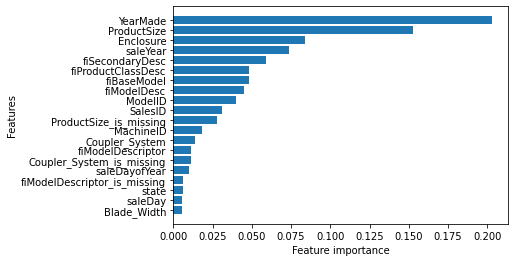

In [83]:
plot_features(X_train.columns, ideal_model.feature_importances_)